
<center>
    
## **Laboratory work № 2**
#### **Done by: Nizhivenko A. D.**
### **Topic: The classification problem**
    
</center>

#### **Aims**: to get acquainted with the task of data classification, to master the process of training classifiers and evaluating their quality, to explore the capabilities of the scikit-learn library for this purpose.
   
<center>
    
### **Progress**

</center>



#### **Task 1. Prepare the dataset so that there are no gaps and the qualitative indicators are binarized or recoded.**

Imported libraries are needed when performing laboratory work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, balanced_accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, validation_curve, ShuffleSplit, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

The "adult" dataset was successfully loaded into the DataFrame using the `read_csv` function.

In [2]:
df = pd.read_csv("adult/adult.data", sep=", ", na_values="?", engine="python",
                 names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "gross_income"])

Using the `dropna()` and `fillna()` methods, the gaps are processed.

In [3]:
df.dropna(subset=["workclass", "native_country"], inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0], inplace=True)

Converted all qualitative features into a set of binary features using the `get_dummies()` function and the `map()` method.

In [4]:
for column in ["workclass", "marital_status", "occupation", "relationship", "race", "sex"]:
    df = pd.get_dummies(df, columns=[column], drop_first=True)
df['native_country'] = df['native_country'].map(lambda x: True if x == 'United-States' else False)
df.rename(columns={'native_country': 'united_states'}, inplace=True)

The `education` feature is removed from the feature set, because information about the educational level is already presented in the `education_num` column.

In [5]:
df.drop(columns=["education"], inplace=True)

#### **Task 2: Check if the classes are balanced.**

The balance of classes is checked using the `value_counts()` method and the information is presented in the form of a diagram using `matplotlib.pyplot`. After analyzing the information received, you can see that the classes are unbalanced and the class `<=50K` prevails in the DataFrame.

In [6]:
class_counts = df["gross_income"].value_counts()
print(class_counts)

gross_income
<=50K    22661
>50K      7508
Name: count, dtype: int64


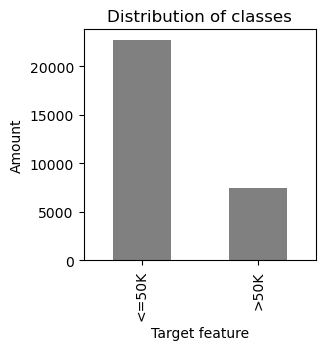

In [7]:
plt.figure(figsize=(3, 3))
class_counts.plot(kind="bar", color="gray")
plt.title("Distribution of classes")
plt.ylabel("Amount")
plt.xlabel("Target feature")
plt.show()

#### **Task 3. Select a metric (or several metrics) that you will use to evaluate the quality of the classification.**

Since we use a dataset in which the classes are unbalanced, we chose quality metrics that are insensitive to class imbalance, namely, we chose `Confusion matrix` (a table showing the number of correct and incorrect predictions made by the classification model based on the test dataset. ), `Balanced accuracy` (the arithmetic mean of correctly classified objects of each class), `Recall` (the share of correctly classified objects of a certain class) and `Precision` (the share of objects of a certain class among the objects that the classifier has assigned to this class).

#### **Task 4. Divide the dataset into 2 samples: training and test.**


The sample was split into test and training samples using the `train_test_split` function.

In [8]:
X = df.loc[:, df.columns != 'gross_income']
y = df["gross_income"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [10]:
X_test.tail()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,united_states,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
28393,35,35945,13,0,0,40,True,False,False,True,...,False,False,False,False,False,False,False,False,True,True
26870,38,179488,12,0,0,40,True,False,False,True,...,True,False,False,False,False,False,False,False,True,True
18945,20,201799,10,0,0,13,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
18553,41,297186,9,0,0,40,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
18719,32,100135,9,0,0,40,True,True,False,False,...,False,False,False,True,False,False,False,False,True,False


In [11]:
y_test.tail()

28393     >50K
26870    <=50K
18945    <=50K
18553    <=50K
18719    <=50K
Name: gross_income, dtype: object

#### **Task 5. Teach the logistic regression without regularization in the training section.**

Logistic regression without regularization is taught in the training part.

In [12]:
log_reg = LogisticRegression(penalty=None)
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

The parameters of the resulting model are displayed.
The parameters that have been displayed are the weights of the logistic regression model. In this model, each parameter corresponds to a coefficient before one variable in the input data. The number of parameters is equal to the number of features that were used to train the model.
The only intercept parameter `intercept` is responsible for the offset in the model, i.e. the baseline response when all other features are equal to zero.
Each other `coef` parameter corresponds to the coefficient before a particular feature in the dataset.

In [13]:
print(log_reg.intercept_)
print(log_reg.coef_ )

[-0.0003425]
[[-6.55891501e-03 -3.68591167e-06 -1.61936104e-03  3.30567086e-04
   7.51818285e-04 -7.67810388e-03 -3.08000106e-04 -6.27740611e-06
  -2.95058401e-07 -3.56173900e-04  4.21533256e-05 -2.22103808e-05
  -9.18650152e-06 -9.53911571e-07  9.01231620e-07  3.81250139e-04
  -1.43351410e-05 -4.66125161e-04 -3.90756930e-05 -3.66818410e-05
  -2.07811852e-07 -5.84943495e-05  1.18582257e-04 -4.52224406e-05
  -5.54167829e-05 -5.73187804e-05 -1.57678799e-04 -7.34152754e-06
   8.10521996e-05  8.21861219e-06 -2.58567076e-05  2.35306139e-06
  -3.02058979e-05 -3.02494430e-04 -3.98417804e-05 -2.36746260e-04
  -1.50252211e-04  4.77748601e-05 -1.05099495e-05 -6.73321170e-05
  -8.85543094e-06 -2.40033500e-04  1.70437539e-05]]


#### **Task 6. Calculate the quality metrics for the training and test parts.**

Quality metrics for the training part were calculated.

In [14]:
print(f"Train balanced accuracy: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"Train recall: {recall_score(y_train, y_pred_train, average=None)}")
print(f"Train precision: {precision_score(y_train, y_pred_train, average=None)}")
print(f"Train confusion matrix:\n {confusion_matrix(y_train, y_pred_train)}")

Train balanced accuracy: 0.6139143891644463
Train recall: [0.96585751 0.26197127]
Train precision: [0.79875959 0.71670306]
Train confusion matrix:
 [[14682   519]
 [ 3699  1313]]


Calculated quality metrics on the test part.

In [15]:
print(f"Test balanced accuracy: {balanced_accuracy_score(y_test, y_pred_test)}")
print(f"Test recall: {recall_score(y_test, y_pred_test, average=None)}")
print(f"Test precision: {precision_score(y_test, y_pred_test, average=None)}")
print(f"Test confusion matrix:\n {confusion_matrix(y_test, y_pred_test)}")

Test balanced accuracy: 0.6153244655255379
Test recall: [0.96782842 0.26282051]
Test precision: [0.79690949 0.73214286]
Test confusion matrix:
 [[7220  240]
 [1840  656]]


Based on the information obtained, we can conclude that the model probably suffers from the problem of overfitting and underestimating the second class. First of all, the model has a high level of `balanced accuracy` on the training and test samples, which indicates that it has successfully learned the underlying patterns of the data. However, a careful analysis of the `precision` and `recall` metrics reveals problems with the second class recognition.

It seems that the model has retrained on the first class, as it significantly prevails in the training data. This may also be the result of the model's excessive complexity, which tries to maximize its accuracy by adapting to the dominant class, neglecting the less represented classes.

#### **Task 7. Train a logistic regression with regularization (L2 or L1 as you wish). To do this, you need to find the optimal value of the regularization parameter. This can be done manually or using the built-in tools of the scikit-learn library.**

The list and dictionary of possible values for the hyperparameter are specified.

In [16]:
hyperparameters_list = np.concatenate((np.arange(0.1, 1, 0.1), np.arange(1, 10, 1), np.arange(10, 100, 10)))
hyperparameters_dict = {"C": np.concatenate((np.arange(0.1, 1, 0.1), np.arange(1, 10, 1), np.arange(10, 100, 10)))}

The training set is divided into two parts: training and validation. This is done to evaluate the quality of the model on independent data that the model did not see during training. This helps to avoid overfitting. We also implemented a loop that searches through the values of hyperparameters, uses each value to train a logistic regression on the training part, and evaluates the quality of the model by selecting the best value of the hyperparameter.

In [17]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.33)

best_accuracy = 0
best_hyperparameter = None

for C in hyperparameters_list:
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear')
    model.fit(X_train2, y_train2)

    y_pred_train2 = model.predict(X_train2)
    y_pred_val = model.predict(X_val)
    accuracy_train2 = balanced_accuracy_score(y_train2, y_pred_train2)
    accuracy_val = balanced_accuracy_score(y_val, y_pred_val)
    print(f"Hyperparameter {C}:")
    print(f"Balanced acuracy train: {accuracy_train2}")
    print(f"Balanced acuracy validation: {accuracy_val} \n")
    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_hyperparameter = C

print("Best hyperparameter value:", best_hyperparameter)
print("Validation balanced accuracy:", best_accuracy)

Hyperparameter 0.1:
Balanced acuracy train: 0.7561450444247729
Balanced acuracy validation: 0.7612367847324812 

Hyperparameter 0.2:
Balanced acuracy train: 0.7641499404391112
Balanced acuracy validation: 0.7648250904236045 

Hyperparameter 0.30000000000000004:
Balanced acuracy train: 0.7656836606450061
Balanced acuracy validation: 0.766359737292823 

Hyperparameter 0.4:
Balanced acuracy train: 0.7668682338283991
Balanced acuracy validation: 0.7678869211657613 

Hyperparameter 0.5:
Balanced acuracy train: 0.7674632744281609
Balanced acuracy validation: 0.767184186020097 

Hyperparameter 0.6:
Balanced acuracy train: 0.7588331311541698
Balanced acuracy validation: 0.7608819586979583 

Hyperparameter 0.7000000000000001:
Balanced acuracy train: 0.7680540310153765
Balanced acuracy validation: 0.7674896227946846 

Hyperparameter 0.8:
Balanced acuracy train: 0.7669702632700568
Balanced acuracy validation: 0.768932408067414 

Hyperparameter 0.9:
Balanced acuracy train: 0.7677601827262495
Balan

Using the `validation_curve` function, a training curve was built using `KFold` as the `cv` argument.

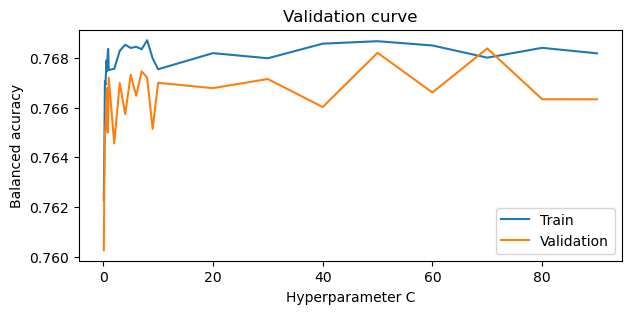

In [18]:
train_scores, val_scores = validation_curve(
    LogisticRegression(penalty="l1", solver="liblinear"), 
    X_train, y_train, param_name="C", param_range=hyperparameters_list, 
    scoring="balanced_accuracy", cv=KFold(n_splits=5, shuffle=True))

plt.figure(figsize=(7, 3))
plt.plot(hyperparameters_list, train_scores.mean(axis=1), label="Train")
plt.plot(hyperparameters_list, val_scores.mean(axis=1), label="Validation")
plt.title("Validation curve")
plt.xlabel("Hyperparameter C")
plt.ylabel("Balanced acuracy")
plt.legend()
plt.show()

Using the `validation_curve` function, a training curve was built using `ShuffleSplit` as the `cv` argument.

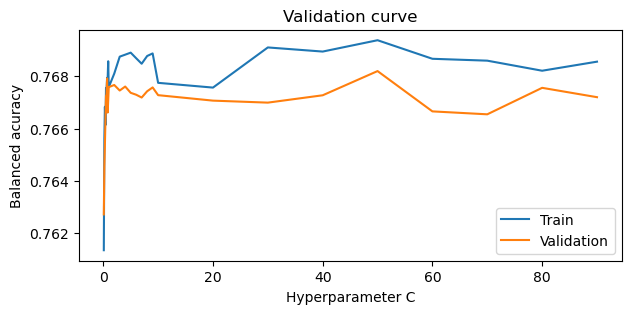

In [19]:
train_scores, val_scores = validation_curve(
    LogisticRegression(penalty="l1", solver="liblinear"), 
    X_train, y_train, param_name="C", param_range=hyperparameters_list, 
    scoring="balanced_accuracy", cv=ShuffleSplit(n_splits=5, test_size=0.33))

plt.figure(figsize=(7, 3))
plt.plot(hyperparameters_list, train_scores.mean(axis=1), label="Train")
plt.plot(hyperparameters_list, val_scores.mean(axis=1), label="Validation")
plt.title("Validation curve")
plt.xlabel("Hyperparameter C")
plt.ylabel("Balanced acuracy")
plt.legend()
plt.show()

The `validation_curve` function helps in evaluating the training and cross-validation for model hyperparameter selection. The main idea is that it automatically calculates the value of the model quality indicator for different values of the hyperparameter and then visualizes these results.

The function builds a model for each value of the hyperparameter, using cross-validation to assess the quality. For each value of the hyperparameter, it calculates the average value of the quality metric (e.g., average error or average precision) on the training set and the validation set for each cross-validation rollup. It then averages these values over all convolutions to obtain the final result for each hyperparameter value.

In this paper, `balanced accuracy` is used as the `scoring` quality measure.

As for the `cv` argument, it indicates the number of convolutions to be used for cross-validation. In the rotation, the strategies `KFold` and `ShuffleSplit` were used.

In the cross-validation with the `KFold` strategy, the data is divided into k groups, but each group is used as a training and validation set the same number of times. This allows you to use different parts of the data to evaluate the model each time.

`ShuffleSplit` strategy randomly splits the data into training and validation sets. 

With the help of the `RandomizedSearchCV` class, hyperparameters are automatically selected.

In [20]:
random_search = RandomizedSearchCV(LogisticRegression(penalty="l1", solver="liblinear"), hyperparameters_dict, scoring="balanced_accuracy", cv=5)
random_search.fit(X_train, y_train)

best_C_rand = random_search.best_params_["C"]
best_accuracy_rand = random_search.best_score_

print("Best hyperparameter value wtih RandomizedSearchCV:", best_C_rand)
print("Balanced acuracy:", best_accuracy_rand)

Best hyperparameter value wtih RandomizedSearchCV: 50.0
Balanced acuracy: 0.7681260851574059


With the help of the `GridSearchCV` class, hyperparameters are automatically selected.

In [21]:
grid_search = GridSearchCV(LogisticRegression(penalty="l1", solver="liblinear"), hyperparameters_dict, scoring="balanced_accuracy", cv=5)
grid_search.fit(X_train, y_train)

best_C_grid = grid_search.best_params_["C"]
best_accuracy_grid = grid_search.best_score_

print("Best hyperparameter value wtih GridSearchCV:", best_C_grid)
print("Balanced acuracy:", best_accuracy_grid)

Best hyperparameter value wtih GridSearchCV: 0.8
Balanced acuracy: 0.7676239681985795


As before, the `scoring` quality indicator is `balanced accuracy`, and the value of the `cv` argument is 5, which means that the data is divided into 5 parts, and each model instance will be trained 5 times: 4 times on the training set and 1 time on the test set.

#### **Task 8. For a logistic regression with a selected hyperparameter, calculate the quality metrics for the training and test parts.**

A logistic regression with L1 regularization and the hyperparameter C, which was previously created with the help of the `GridSearchCV` class, was constructed.

In [22]:
log_reg_l1= LogisticRegression(penalty="l1", solver="liblinear", C=best_C_grid)
log_reg_l1.fit(X_train, y_train)
y_pred_train = log_reg_l1.predict(X_train)
y_pred_test = log_reg_l1.predict(X_test)

Calculated quality metrics for the training part.

In [23]:
print(f"Train balanced accuracy: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"Train recall: {recall_score(y_train, y_pred_train, average=None)}")
print(f"Train precision: {precision_score(y_train, y_pred_train, average=None)}")
print(f"Train confusion matrix:\n {confusion_matrix(y_train, y_pred_train)}")

Train balanced accuracy: 0.7673577887118674
Train recall: [0.9273732  0.60734238]
Train precision: [0.87749767 0.73384764]
Train confusion matrix:
 [[14097  1104]
 [ 1968  3044]]


Calculated quality metrics on the test part.

In [24]:
print(f"Test balanced accuracy: {balanced_accuracy_score(y_test, y_pred_test)}")
print(f"Test recall: {recall_score(y_test, y_pred_test, average=None)}")
print(f"Test precision: {precision_score(y_test, y_pred_test, average=None)}")
print(f"Test confusion matrix:\n {confusion_matrix(y_test, y_pred_test)}")

Test balanced accuracy: 0.7720957285007217
Test recall: [0.92520107 0.61899038]
Test precision: [0.87889978 0.73466476]
Test confusion matrix:
 [[6902  558]
 [ 951 1545]]


After applying L1 regularization and fitting the hyperparameter C, the model improved significantly. We observe an increase in `balanced accuracy` on both training and test samples, which indicates its ability to better generalize new data. In addition, the model has become better at recognizing both classes, as evidenced by the improvement in the `precision` and `recall` metrics. These improvements make the model more reliable and suitable for practical use.

#### **Task 9. Try to make a selection of informative indicators for logistic regression, train a model based on only selected indicators and evaluate its quality.**

The "adult" dataset has been imported.

In [25]:
df2 = pd.read_csv("adult/adult.data", sep=", ", na_values="?", engine="python",
                 names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "gross_income"])

Data was pre-processed and uninformative indicators were removed.

In [26]:
df2.dropna(subset=["workclass", "native_country"], inplace=True)
df2["occupation"].fillna(df2["occupation"].mode()[0], inplace=True)
df2['native_country'] = df2['native_country'].map(lambda x: True if x == 'United-States' else False)
df2.rename(columns={'native_country': 'united_states'}, inplace=True)
df2.drop(columns=["education", "race", "sex", "marital_status"], inplace=True)
for column in ["workclass", "occupation", "relationship"]:
    df2 = pd.get_dummies(df2, columns=[column], drop_first=True)

A new test and training set is divided, and a logistic regression model with L1 regularization is trained on the training set. The difference between this model and the previous one is that the classes fed into the model are balanced.

In [27]:
X2 = df2.loc[:, df2.columns != 'gross_income']
y2 = df2["gross_income"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33)
log_reg_l1B= LogisticRegression(penalty="l1", solver="liblinear", C=best_C_grid, class_weight='balanced')
log_reg_l1B.fit(X_train2, y_train2)
y_pred_train = log_reg_l1B.predict(X_train2)
y_pred_test = log_reg_l1B.predict(X_test2)

Quality metrics for the training part were calculated.

In [28]:
print(f"Train balanced accuracy: {balanced_accuracy_score(y_train2, y_pred_train)}")
print(f"Train recall: {recall_score(y_train2, y_pred_train, average=None)}")
print(f"Train precision: {precision_score(y_train2, y_pred_train, average=None)}")
print(f"Train confusion matrix:\n {confusion_matrix(y_train2, y_pred_train)}")

Train balanced accuracy: 0.8184085761151267
Train recall: [0.79684107 0.83997609]
Train precision: [0.93780497 0.57723911]
Train confusion matrix:
 [[12108  3087]
 [  803  4215]]


Calculated quality metrics on the test part.

In [29]:
print(f"Test balanced accuracy: {balanced_accuracy_score(y_test2, y_pred_test)}")
print(f"Test recall: {recall_score(y_test2, y_pred_test, average=None)}")
print(f"Test precision: {precision_score(y_test2, y_pred_test, average=None)}")
print(f"Test confusion matrix:\n {confusion_matrix(y_test2, y_pred_test)}")

Test balanced accuracy: 0.8179513123482411
Test recall: [0.79815162 0.837751  ]
Test precision: [0.93650794 0.58057334]
Test confusion matrix:
 [[5959 1507]
 [ 404 2086]]


In this case, the logistic regression model with L1-type regularization and balanced class weights performs quite well on both training and test data. The `balanced accuracy`, `recall`, and `precision` for both classes are high, indicating that the model successfully discriminates between classes and avoids overfitting.
An important feature is the balance of classes and the reduction of features, which has a positive effect on avoiding overfitting and improving the generalization ability of the model. 

#### **Task 10. Try to train another classifier by choosing the optimal values of hyperparameters and evaluate its quality.**

For the K-nearest neighbor rule classifier to work correctly, we scaled the quantitative features to the range [0, 1], because this classifier calculates the distance between features. If the scales of different features differ significantly, the distances will be distorted, and this can lead to incorrect classification results.

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
for column in [["age"], ["fnlwgt"], ["education_num"], ["capital_gain"], ["capital_loss"], ["hours_per_week"]]:
    df[column] = scaler.fit_transform(df[column])

With the help of the `GridSearchCV` class, the optimal value of the number of neighbors was calculated.

In [31]:
search = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": np.concatenate((np.arange(1, 10, 1), np.arange(10, 100, 10)))}, scoring="balanced_accuracy", cv=5)
search.fit(X_train, y_train)

best_n_neighbors = search.best_params_["n_neighbors"]

The K-nearest neighbor rule classifier is trained on the training set.

In [32]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

Quality metrics for the training part were calculated.

In [33]:
print(f"Train balanced accuracy: {balanced_accuracy_score(y_train, y_pred_train)}")
print(f"Train recall: {recall_score(y_train, y_pred_train, average=None)}")
print(f"Train precision: {precision_score(y_train, y_pred_train, average=None)}")
print(f"Train confusion matrix:\n {confusion_matrix(y_train, y_pred_train)}")

Train balanced accuracy: 1.0
Train recall: [1. 1.]
Train precision: [1. 1.]
Train confusion matrix:
 [[15201     0]
 [    0  5012]]


Calculated quality metrics on the test part.

In [34]:
print(f"Test balanced accuracy: {balanced_accuracy_score(y_test, y_pred_test)}")
print(f"Test recall: {recall_score(y_test, y_pred_test, average=None)}")
print(f"Test precision: {precision_score(y_test, y_pred_test, average=None)}")
print(f"Test confusion matrix:\n {confusion_matrix(y_test, y_pred_test)}")

Test balanced accuracy: 0.6192191689008043
Test recall: [0.80093834 0.4375    ]
Test precision: [0.80973032 0.42374854]
Test confusion matrix:
 [[5975 1485]
 [1404 1092]]


According to the above metrics, this model demonstrates less satisfactory results compared to the previous models. The `Balanced acuracy` on the test set is lower, indicating that the model is less effective at discriminating between classes on new data. Recall for the second class is extremely low, indicating that the model did a poor job of identifying this class. Precision for both classes is also low, especially for the second class. 

#### **Task 11. Compare the quality of the trained classifiers on the test set. Which classifier is better?**

A function for testing the model has been created.

In [35]:
def estimate_clf(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    print(f"Test balanced accuracy: {balanced_accuracy_score(y_test, y_pred_test)}")
    print(f"Test recall: {recall_score(y_test, y_pred_test, average=None)}")
    print(f"Test precision: {precision_score(y_test, y_pred_test, average=None)}")
    print(f"Test confusion matrix:\n {confusion_matrix(y_test, y_pred_test)} \n\n")

All models were trained, once again on a new data set, and quality metrics for each model were also derived.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("Logistic Regression:")
estimate_clf(log_reg, X_train, X_test, y_train, y_test)
print("Logistic Regression L1:")
estimate_clf(log_reg_l1, X_train, X_test, y_train, y_test)
print("Logistic Regression L1 with balanced classes:")
estimate_clf(log_reg_l1B, X_train, X_test, y_train, y_test)
print("kNN:")
estimate_clf(knn, X_train, X_test, y_train, y_test)

Logistic Regression:
Test balanced accuracy: 0.6197762112143752
Test recall: [0.96103029 0.27852213]
Test precision: [0.80207173 0.70143149]
Test confusion matrix:
 [[7201  292]
 [1777  686]] 


Logistic Regression L1:
Test balanced accuracy: 0.7635680431252685
Test recall: [0.9229948  0.60414129]
Test precision: [0.87644152 0.72058111]
Test confusion matrix:
 [[6916  577]
 [ 975 1488]] 


Logistic Regression L1 with balanced classes:
Test balanced accuracy: 0.812845839768491
Test recall: [0.79580942 0.82988226]
Test precision: [0.9343466  0.57190823]
Test confusion matrix:
 [[5963 1530]
 [ 419 2044]] 


kNN:
Test balanced accuracy: 0.6383230926209164
Test recall: [0.79674363 0.47990256]
Test precision: [0.82333471 0.43696858]
Test confusion matrix:
 [[5970 1523]
 [1281 1182]] 




Comparing the quality of the classifiers on the test part, we can note that the L1 logistic regression using balanced classes seems to be the best among the models presented. It achieves the highest level of balanced accuracy and provides good performance for both accuracy and completeness of both classes. This model demonstrates the ability to correctly classify data with high accuracy, given the importance of avoiding both first- and second-order errors.